<a href="https://colab.research.google.com/github/Luenpa01/AeroSim-Toolbox/blob/main/AI_ClassWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **1. Carga de base de datos** 
### Se carga la base de datos, y se observan algunos registros para tener en cuenta las diferentes variables.

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder

dfHospital = pd.read_csv("BBDD_post_pabellon.csv", sep=";")
dfHospital.head(75) 

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,NO,4,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,"7,7",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,53,NO,NO,7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",SI,3,0
3,65,NO,NO,"4,3",NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,3,SI,NO,NO,NO,NO,SI,2,0
4,62,NO,NO,7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,3,SI,NO,NO,NO,NO,SI,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,59,NO,NO,"4,5",NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
71,71,NO,NO,"8,3",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
72,60,NO,NO,"6,5",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,18,NO,NO,PROSTATITIS,NO,NO,NO,NO,NO,NO,NO,0,0
73,70,NO,NO,"7,2",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0,0


# 2. Análisis básico
## Se obtiene información básica sobre la base de datos

In [228]:
dfHospital.info()
# Observamos si existen datos nulos o no, y el tipo de datos de cada variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   EDAD                                                                       568 non-null    int64 
 1   DIABETES                                                                   568 non-null    object
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object
 3   PSA                                                                        564 non-null    object
 4   BIOPSIAS PREVIAS                                                           566 non-null    object
 5   VOLUMEN PROSTATICO                                                         567 non-null    object
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                           

In [229]:

df = dfHospital
dfHospital.describe()

,EDAD,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,568.000000,568.000000,568.000000
mean,63.882042,12.996479,0.165493,0.014085
std,9.281517,3.921180,0.958066,0.196474
min,39.000000,4.000000,0.000000,0.000000
25%,59.000000,12.000000,0.000000,0.000000
50%,64.000000,12.000000,0.000000,0.000000
75%,69.000000,12.000000,0.000000,0.000000
max,151.000000,24.000000,12.000000,3.000000


# 3. Preparación de datos

## Elinamos algunas variables irrelevantes en el estudio

In [230]:
df = df.drop(['PATRON DE RESISTENCIA','AGENTE AISLADO','ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS','ENF. CRONICA PULMONAR OBSTRUCTIVA'], axis=1)
# Eliminamos patron de resistencia debido a que es una variable que relaciona sobre medicamentos resistentes en caso de que exista una infeccion, sin embargo para saber si esta o no esta hospitalizado es irrelevante

# Agente aislado, es una variable poco util, ya que es el nombre de la bacteria/protista causante de la infección, lo cual es irrelevante para saber si esta o no esta hospitalizado

# ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS, es la variable que nos comenta que medicamento es usado en la profilaxis, debido a que no estamos estudiando los microorganismos, es irrelevante

# ENF. CRONICA PULMONAR OBSTRUCTIVA, es la variable que indica si el paciente padece de una enfermedad pulmonar obstructiva croncia, debido a que no es un indicador significativo, no es tomado en cuenta en este estudio

In [231]:
#conversión a variables categóricas
df['HOSPITALIZACION']=df['HOSPITALIZACION'].astype('category')
df['FIEBRE']=df['FIEBRE'].astype('category')
df['DIABETES']=df['DIABETES'].astype('category')
df['HOSPITALIZACIÓN ULTIMO MES']=df['HOSPITALIZACIÓN ULTIMO MES'].astype('category')
df['BIOPSIAS PREVIAS']=df['BIOPSIAS PREVIAS'].astype('category')
#df['PSA']=df['PSA'].astype('category')
df['CUP']=df['CUP'].astype('category')
df['ITU']=df['ITU'].astype('category')
df['BIOPSIA']=df['BIOPSIA'].astype('category')
df['TIPO DE CULTIVO']=df['TIPO DE CULTIVO'].astype('category')
df['VOLUMEN PROSTATICO']=df['VOLUMEN PROSTATICO'].astype('category')
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA']=df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].astype('category')


In [232]:
dummies = pd.get_dummies(df['HOSPITALIZACION'], drop_first = True)

df = pd.concat([df, dummies], axis = 1)
dummies.head(5)

,SI
0,1
1,1
2,1
3,1
4,1


In [233]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,SI
0,53,NO,NO,4,NO,SI,12,NO,NEG,1,SI,NO,NO,SI,2,0,1
1,56,NO,NO,"7,7",NO,SI,12,NO,NEG,1,SI,NO,NO,SI,5,0,1
2,53,NO,NO,7,NO,SI,12,NO,NEG,2,SI,SI,UROCULTIVO,SI,3,0,1
3,65,NO,NO,"4,3",NO,NO,12,NO,NEG,3,SI,NO,NO,SI,2,0,1
4,62,NO,NO,7,NO,SI,12,NO,NEG,3,SI,NO,NO,SI,4,0,1


## Revisamos valores atipicos de nuestra base de datos

### Primeramente analizamos las edades

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


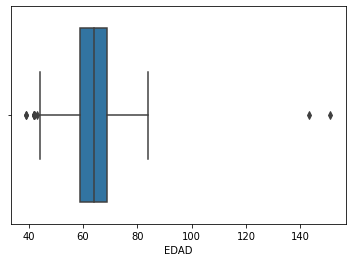

In [234]:
# Usamos un diagrama de  box and whiskers

sns.boxplot(df['EDAD'])


In [235]:
print(np.where(df['EDAD']>120))

(array([137, 160]),)


In [236]:
# Z score

 
z = np.abs(stats.zscore(df['EDAD']))
print(z)

threshold = 3
 
# Posición del outlier 
print(np.where(z > 3))

0      1.173476
1      0.849968
2      1.173476
3      0.120556
4      0.202952
         ...   
563    0.742132
564    1.198916
565    1.522424
566    0.336228
567    0.012720
Name: EDAD, Length: 568, dtype: float64
(array([137, 160]),)


Old Shape:  (568, 17)
(array([137, 160]),)
New Shape:  (566, 17)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


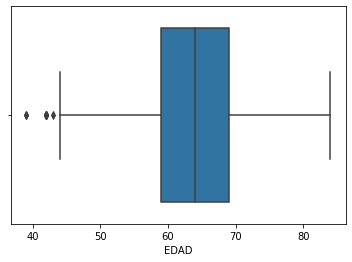

In [237]:
print("Old Shape: ", df.shape)
Location = np.where(df['EDAD'] >120)
print(Location)
df.drop(Location[0], inplace = True)

 
print("New Shape: ", df.shape)

sns.boxplot(df['EDAD'])

### Luego analizamos el numero de muestras 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


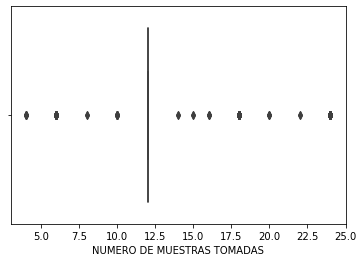

In [238]:
sns.boxplot(df['NUMERO DE MUESTRAS TOMADAS'])

### Analizamos PSA

In [239]:
df['PSA'] = df['PSA'].str.replace(',','.')
df['PSA'] = df['PSA'].astype('float')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


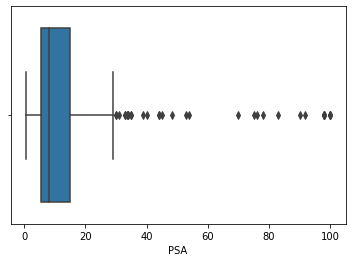

In [240]:
sns.boxplot(df['PSA'])

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 567
Data columns (total 17 columns):
 #   Column                                                                     Non-Null Count  Dtype   
---  ------                                                                     --------------  -----   
 0   EDAD                                                                       566 non-null    int64   
 1   DIABETES                                                                   566 non-null    category
 2   HOSPITALIZACIÓN ULTIMO MES                                                 566 non-null    category
 3   PSA                                                                        562 non-null    float64 
 4   BIOPSIAS PREVIAS                                                           564 non-null    category
 5   VOLUMEN PROSTATICO                                                         565 non-null    category
 6   NUMERO DE MUESTRAS TOMADAS                        

In [242]:
dfa = df['HOSPITALIZACION'].isnull()
dfa = dfa.tolist()
dfa  = np.array(dfa)
IndexNull = np.where(dfa == True)


print('Los indices donde hay datos nulos en la variable Hospitalización son: ', IndexNull)

# Aqui observamos los indices que nulos de la variable hospitalización, a los cuales le podemos imputar datos a partir de los dias de hospitalización MQ y UPC, ya que si alguno de estos datos es diferente de cero, significa que si hubo hospitalización, en caso contrario se asume que no se hospitalizo.



dfb =pd.concat([df['DIAS HOSPITALIZACION MQ'],df['DIAS HOSPITALIZACIÓN UPC']],axis=1)

b = dfb.iloc[IndexNull]
b = b.values.tolist()

# En este bloque de codigo inputamos donde existen valores nulos, utilizando la información obtenida anteriormente. 
for i in b:
  for ii in i:
    if ii == 0: 
      df['HOSPITALIZACION'][74] = 'NO'
      df['HOSPITALIZACION'][83] = 'NO'
      df['HOSPITALIZACION'][142] ='NO'
    else:
      df['HOSPITALIZACION'][74] = 'SI'
      df['HOSPITALIZACION'][83] = 'SI'
      df['HOSPITALIZACION'][142] = 'SI'
        
# En esta línea de código verificamos que la variable hospitalziacion no tenga variables celdas nulas.
df.info()
# Debido a la existencia de valores nulos en otras variables, y la imposibilidad de eliminarlos debidos a su naturaleza, procedemos a eliminar los registros que lo contienen

df = df.dropna()

df.info()
    

Los indices donde hay datos nulos en la variable Hospitalización son:  (array([ 74,  83, 141]),)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 567
Data columns (total 17 columns):
 #   Column                                                                     Non-Null Count  Dtype   
---  ------                                                                     --------------  -----   
 0   EDAD                                                                       566 non-null    int64   
 1   DIABETES                                                                   566 non-null    category
 2   HOSPITALIZACIÓN ULTIMO MES                                                 566 non-null    category
 3   PSA                                                                        562 non-null    float64 
 4   BIOPSIAS PREVIAS                                                           564 non-null    category
 5   VOLUMEN PROSTATICO                                        

# 4. Análisis por variables

In [243]:
corr = df.corr(method = 'pearson')
corr.style.background_gradient (cmap = 'coolwarm')

# En este segmentos podemos observar la correlacion existente entre algunas variables del estudio, entre ellos el dummy relacionado con los dias de hospitalizacion, se puede deducir que la mayoria de pacientes que fueron hospitalizados, tuvieron una intervencion quirurgica, debido a la correlacion entre lso dias de hospitalizacion y la hospitalziaicon post quirurgica

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,SI
EDAD,1.000000,0.185037,-0.211554,-0.019681,-0.035887,-0.052579
PSA,0.185037,1.000000,-0.204141,-0.033959,0.043742,-0.063287
NUMERO DE MUESTRAS TOMADAS,-0.211554,-0.204141,1.000000,0.094426,0.147873,0.085612
DIAS HOSPITALIZACION MQ,-0.019681,-0.033959,0.094426,1.000000,0.252177,0.821004
DIAS HOSPITALIZACIÓN UPC,-0.035887,0.043742,0.147873,0.252177,1.000000,0.349172
SI,-0.052579,-0.063287,0.085612,0.821004,0.349172,1.000000
